In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [2]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import time


2024-11-24 12:48:15.864612: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-24 12:48:15.864786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 12:48:16.017376: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Load the balanced training dataset
balanced_train = pd.read_csv("../input/emnist/emnist-balanced-train.csv")
# Load the balanced testing dataset
balanced_test = pd.read_csv("../input/emnist/emnist-balanced-test.csv")
# Load the mapping
mapp = pd.read_csv("../input/emnist/emnist-balanced-mapping.txt", delimiter=' ', index_col=0, header=None)

In [4]:
#printing shapes 
print(f"""
Train: {balanced_train.shape}
Test:  {balanced_test.shape}
Map:   {mapp.shape}
""")


Train: (112799, 785)
Test:  (18799, 785)
Map:   (47, 1)



In [5]:
# Create keys as integers from 0 to the length of the mapping values
keys = range(len(mapp[1].values)) 

# Convert the integer values to corresponding characters using ASCII
values = [chr(v) for v in mapp[1].values]

# Create a dictionary mapping integers to characters
map_dict = dict(zip(keys, values))
map_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [6]:
#splliting target coloumn and features from train and test dataset
#training
X_train = np.array(balanced_train.iloc[:,1:].values)
y_train = np.array(balanced_train.iloc[:,0].values)

#testing
X_test = np.array(balanced_test.iloc[:,1:].values)
y_test = np.array(balanced_test.iloc[:,0].values)

print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (112799, 784)
y_train: (112799,)
x_test: (18799, 784)
y_test: (18799,)


In [7]:
#displaying the no of classes
column_name = '45'
if column_name in balanced_train.columns:
    classes = len(balanced_train[column_name].unique())
    print(f"number of classes  : {classes}") 
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

number of classes  : 47


In [8]:
#storing no of classes in classes variable for input size for output layers
classes = len(balanced_train['45'].unique()) 
print('number of classes : ', classes) 

number of classes :  47


In [9]:
def rotate_emnist(x_data):
    
    x_data = x_data.reshape(x_data.shape[0], 28, 28)
    x_data = np.transpose(x_data,(0,2,1))
    
    return(x_data)

X_train = rotate_emnist(X_train)
X_test = rotate_emnist(X_test)

In [10]:
# Normalise and reshape data
X_train = X_train.astype('float32')  / 255.0
X_test = X_test.astype('float32')  / 255.0

In [11]:
# One hot encoding
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)
print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (112799, 28, 28)
y_train: (112799, 47)
x_test: (18799, 28, 28)
y_test: (18799, 47)


# Create the first MLP Model

In [12]:
# Flatten the images from 28x28 dimensions and normalize them
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

print("x_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",X_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (112799, 784)
y_train :  (112799, 47)
x_test  :  (18799, 784)
y_test  :  (18799, 47)


In [13]:
# Define the model
model0 = Sequential()

# Input layer
# Define the input layer with the shape corresponding to flattened 28x28 images
model0.add(tf.keras.layers.Input(shape=(28 * 28,)))

# Add the hidden layer with 128 units and ReLU activation function
model0.add(tf.keras.layers.Dense(128, activation='relu'))

# Add a dropout layer with a rate of 0.3 to reduce overfitting during training
model0.add(tf.keras.layers.Dropout(0.3))

# Output layer: Using softmax activation for multi-class classification.
model0.add(tf.keras.layers.Dense(47, activation='softmax'))

In [14]:
# Summary of the model
model0.summary()

model0.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,543 (416.18 KB)

 Trainable params: 106,543 (416.18 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')

In [16]:
batch_size  = 64
epochs      =  16

start_time0 = time.time()
history0 = model0.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      
                      validation_data = (X_test, y_test),callbacks=MCP)
stop_time0 = time.time()

# Calculate elapsed time
elapsed_time0 = stop_time0 - start_time0
minutes0 = int(elapsed_time0 // 60)
seconds0 = int(elapsed_time0 % 60)

# Print time used in minutes and seconds
print(f'training_time0 = {minutes0} min {seconds0} sec')

Epoch 1/16
 108/1763 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0284 - loss: 3.8561

I0000 00:00:1732452521.706106     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1732452521.717179     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1763/1763 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1881 - loss: 3.2655

W0000 00:00:1732452525.450805     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1732452525.948633     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.55907, saving model to Best_points.keras
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1882 - loss: 3.2652 - val_accuracy: 0.5591 - val_loss: 1.8094
Epoch 2/16
  76/1763 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4657 - loss: 1.9949

W0000 00:00:1732452526.631919     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1751/1763 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4923 - loss: 1.8830
Epoch 2: val_accuracy improved from 0.55907 to 0.61562, saving model to Best_points.keras
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4925 - loss: 1.8823 - val_accuracy: 0.6156 - val_loss: 1.4476
Epoch 3/16
1759/1763 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5577 - loss: 1.5844
Epoch 3: val_accuracy improved from 0.61562 to 0.64057, saving model to Best_points.keras
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5578 - loss: 1.5843 - val_accuracy: 0.6406 - val_loss: 1.3029
Epoch 4/16
1758/1763 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5918 - loss: 1.4444
Epoch 4: val_accuracy improved from 0.64057 to 0.66110, saving model to Best_points.keras
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5918 - loss: 1.4443 - val_accuracy: 0.6611 - val_loss: 1.2166
Epoch 5/16
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6162 - loss: 1.3555
Epoch 5: val_accuracy improved f

In [17]:
score = model0.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

W0000 00:00:1732452568.920396     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test loss     : 0.8386
Test accuracy : 0.7547


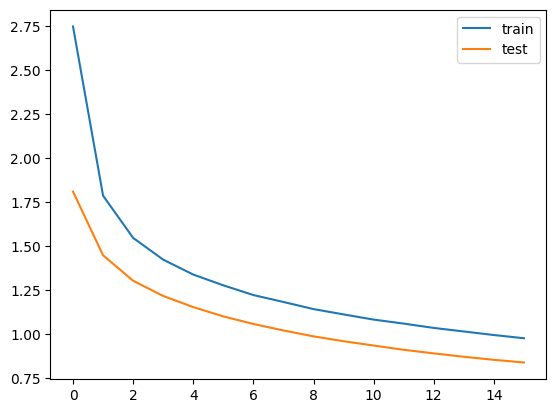

In [18]:
plt.plot(history0.history['loss'], label='train')
plt.plot(history0.history['val_loss'], label='test')
plt.legend()

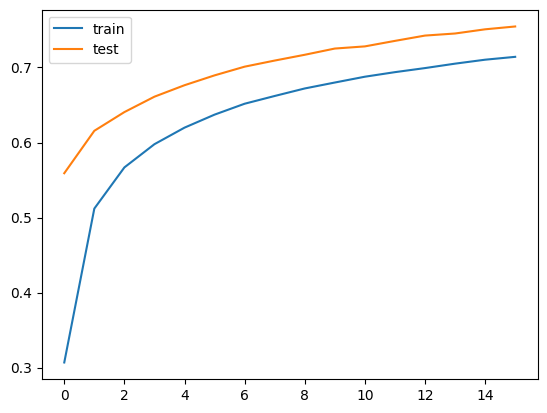

In [19]:
plt.plot(history0.history['accuracy'], label='train')
plt.plot(history0.history['val_accuracy'], label='test')
plt.legend()

# Create the Second MLP Model

In [20]:
# Define the model
model1 = Sequential()

# Input layer
# Define the input layer with the shape corresponding to flattened 28x28 images
model1.add(tf.keras.layers.Input(shape=(28 * 28,)))

# Add the first hidden layer with 512 units and ReLU activation function
model1.add(tf.keras.layers.Dense(512, activation='relu'))

# Add a dropout layer with a rate of 0.3 to reduce overfitting during training
model1.add(tf.keras.layers.Dropout(0.3))

# Hidden Layer
# Adding the first hidden layer with 256 units and ReLU activation function.
model1.add(tf.keras.layers.Dense(256, activation='relu'))  # hidden layer 1

# Adding a dropout layer with a rate of 0.3 to reduce overfitting.
model1.add(tf.keras.layers.Dropout(0.3))

# Adding the second hidden layer with 128 units and ReLU activation function.
model1.add(tf.keras.layers.Dense(128, activation='relu'))  # hidden layer 2

# Adding another dropout layer with a rate of 0.3 to enhance generalization.
model1.add(tf.keras.layers.Dropout(0.3))

# Output Layer
# Output layer: Using softmax activation for multi-class classification.
model1.add(tf.keras.layers.Dense(47, activation='softmax'))

In [21]:
# Summary of the model
model1.summary()

optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust optimizer and learning rate
model1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 572,207 (2.18 MB)

 Trainable params: 572,207 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
#ES = EarlyStopping(monitor='val_accuracy', min_delta=0, verbose=0, restore_best_weights=True, patience=3, mode='max')
#RLP = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

In [23]:
batch_size  = 256
epochs      =  30

start_time1 = time.time()
history1 = model1.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      
                      validation_data = (X_test, y_test),callbacks=MCP)
stop_time1 = time.time()

# Calculate elapsed time
elapsed_time1 = stop_time1 - start_time1
minutes1 = int(elapsed_time1 // 60)
seconds1 = int(elapsed_time1 % 60)

# Print time used in minutes and seconds
print(f'training_time1 = {minutes1} min {seconds1} sec')

Epoch 1/30
 66/441 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1232 - loss: 3.4346

W0000 00:00:1732452576.565532     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3985 - loss: 2.2112
Epoch 1: val_accuracy improved from -inf to 0.77031, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3988 - loss: 2.2097 - val_accuracy: 0.7703 - val_loss: 0.7352
Epoch 2/30
417/441 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7169 - loss: 0.9045
Epoch 2: val_accuracy improved from 0.77031 to 0.80728, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7175 - loss: 0.9019 - val_accuracy: 0.8073 - val_loss: 0.6029
Epoch 3/30
436/441 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7602 - loss: 0.7402
Epoch 3: val_accuracy improved from 0.80728 to 0.81962, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7603 - loss: 0.7399 - val_accuracy: 0.8196 - val_loss: 0.5436
Epoch 4/30
426/441 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7885 - loss: 0.6533
Epoch 4: val_accuracy improved from 0.81962 to

In [24]:
score = model1.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

W0000 00:00:1732452617.125641     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test loss     : 0.4225
Test accuracy : 0.8587


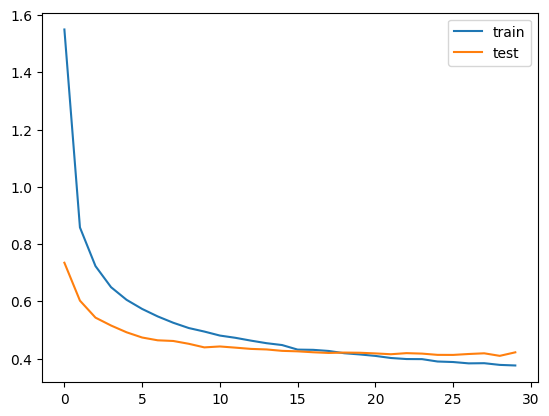

In [25]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()

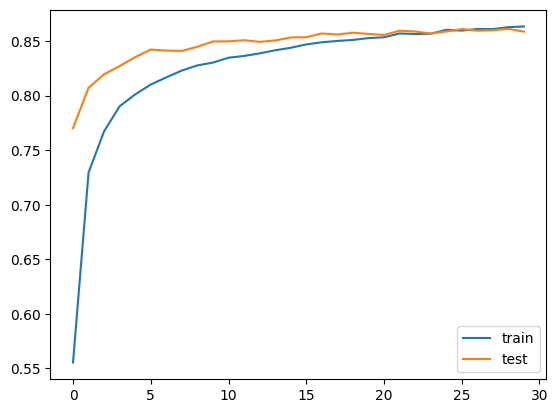

In [26]:
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()

# Create the CNN Model

In [27]:
# Reshaping all images into 28*28*1 for pre-processing 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) 
#displaying shapes for split data for model testing and validation purpose
print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (112799, 28, 28, 1)
y_train: (112799, 47)
x_test: (18799, 28, 28, 1)
y_test: (18799, 47)


In [28]:
# Define the model
model2 = Sequential()

# Input layer
model2.add(keras.layers.Input(shape=(28, 28, 1)))

# Convolutional Layer 1
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

# Convolutional Layer 2
model2.add(Conv2D(16, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

# Flatten and Fully Connected Layers
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))

# Output Layer
model2.add(Dense(47, activation='softmax'))

In [29]:
# Summary of the model
model2.summary()

optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust optimizer and learning rate
model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 47)             │         4,747 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,095 (180.06 KB)

 Trainable params: 46,095 (180.06 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
#ES = EarlyStopping(monitor='val_accuracy', min_delta=0, verbose=0, restore_best_weights=True, patience=3, mode='max')
#RLP = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

In [31]:
batch_size  = 256
epochs      =  30

start_time2 = time.time()
history2 = model2.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      
                      validation_data = (X_test, y_test),callbacks=MCP)
stop_time2 = time.time()

# Calculate elapsed time
elapsed_time2 = stop_time2 - start_time2
minutes2 = int(elapsed_time2 // 60)
seconds2 = int(elapsed_time2 % 60)

# Print time used in minutes and seconds
print(f'training_time2 = {minutes2} min {seconds2} sec')

Epoch 1/30
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2614 - loss: 2.7681
Epoch 1: val_accuracy improved from -inf to 0.75515, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.2618 - loss: 2.7665 - val_accuracy: 0.7551 - val_loss: 0.8469
Epoch 2/30
433/441 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6291 - loss: 1.1977
Epoch 2: val_accuracy improved from 0.75515 to 0.79350, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6295 - loss: 1.1964 - val_accuracy: 0.7935 - val_loss: 0.6649
Epoch 3/30
440/441 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - loss: 0.9905
Epoch 3: val_accuracy improved from 0.79350 to 0.81238, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6889 - loss: 0.9904 - val_accuracy: 0.8124 - val_loss: 0.5880
Epoch 4/30
419/441 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7138 - loss: 0.9091
Epoch 4: val_accuracy improved from

In [32]:
score = model2.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.4210
Test accuracy : 0.8583


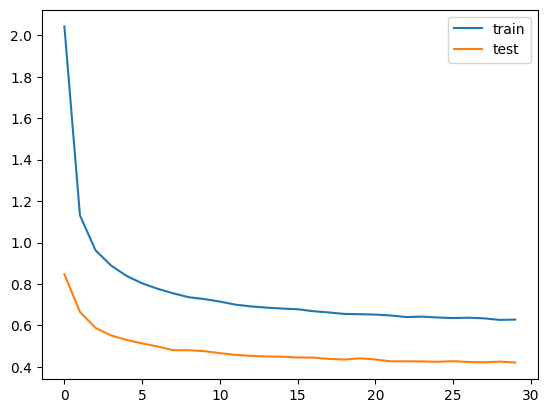

In [33]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()

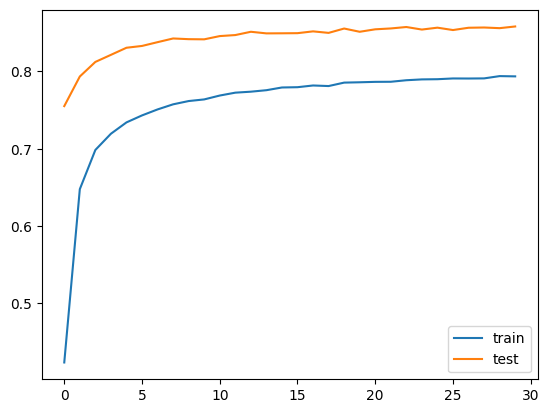

In [34]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


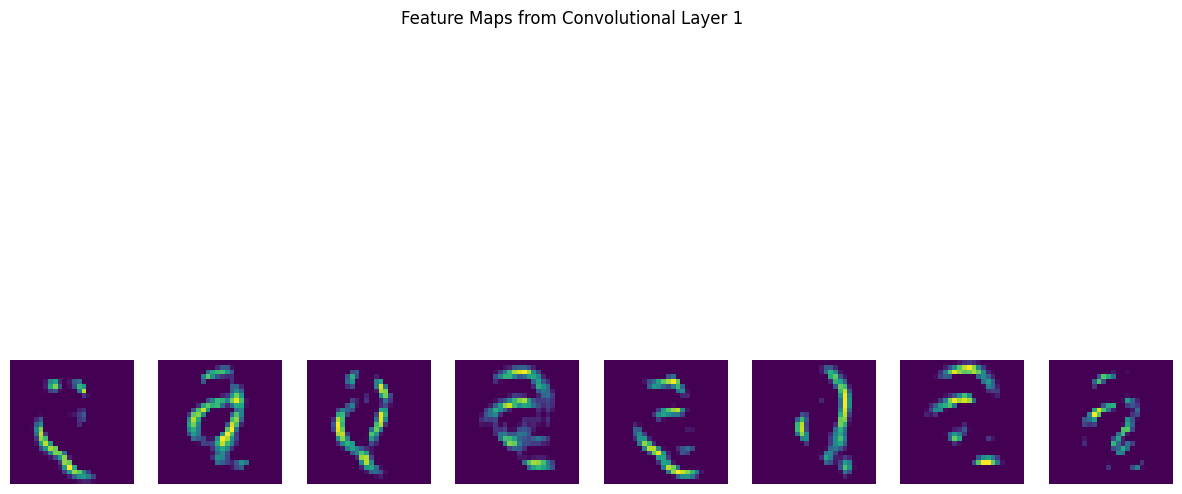

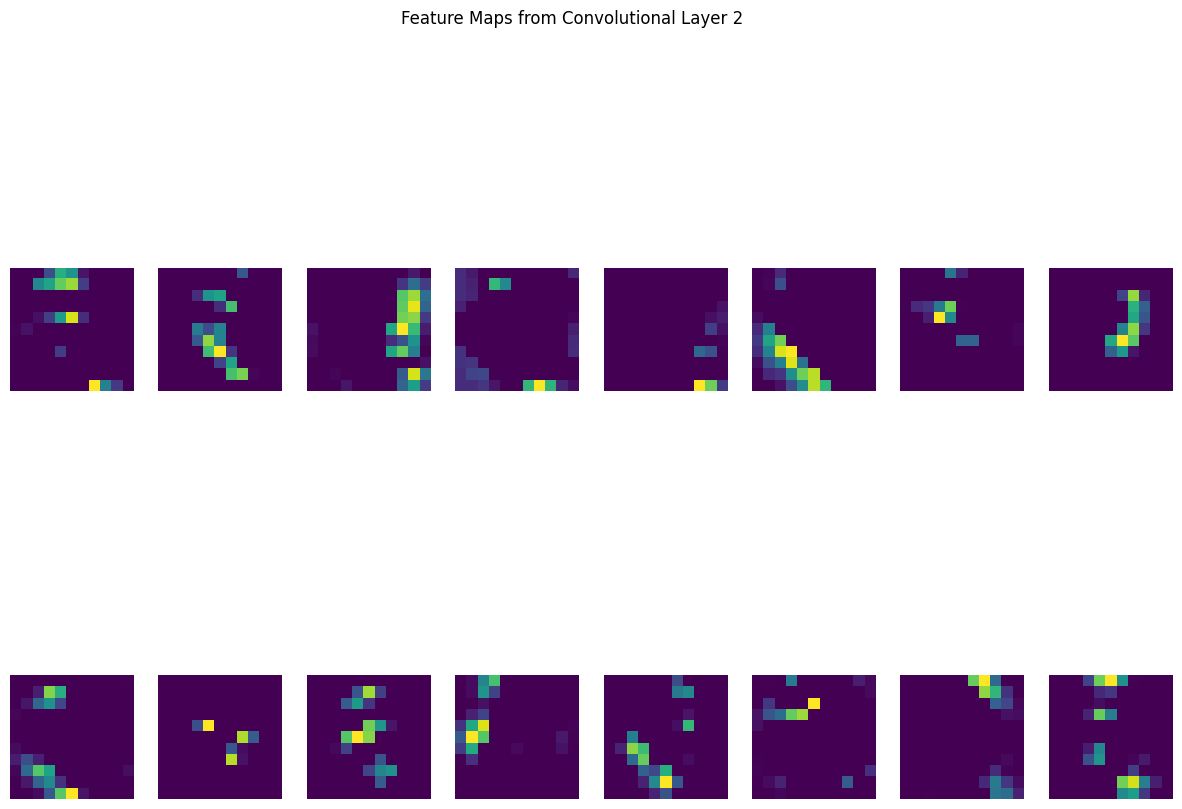

In [35]:
import matplotlib.pyplot as plt
from keras.models import Model

# Choose an image from the dataset
image = X_train[0]  # Select the first training image
image = image.reshape(1, 28, 28, 1)  # Add batch dimension

# Define a new model to output feature maps of the convolutional layers
input_tensor = model2.layers[0].input

layer_outputs = [layer.output for layer in model2.layers if 'conv' in layer.name]
feature_map_model = Model(inputs=input_tensor, outputs=layer_outputs)

# Get feature maps for the selected image
feature_maps = feature_map_model.predict(image)

# Visualize feature maps
for layer_index, feature_map in enumerate(feature_maps):
    num_filters = feature_map.shape[-1]  # Number of filters in the layer
    plt.figure(figsize=(15, 15))
    for i in range(num_filters):
        plt.subplot(num_filters // 8 + 1, 8, i + 1)  # 8 columns
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f'Feature Maps from Convolutional Layer {layer_index + 1}')
    plt.show()

# Create the ResNet Model

In [36]:
# Residual block definition
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    # First convolution
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    # Second convolution
    x = Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    # Add shortcut connection
    if stride != 1:  # If stride changes, adjust shortcut to match dimensions
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Input layer
input_layer = Input(shape=(28, 28, 1))

# Initial convolution and pooling
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)

# Add residual blocks
x = residual_block(x, filters=16)
x = residual_block(x, filters=32, stride=2)
x = residual_block(x, filters=64, stride=2)

# Global average pooling and fully connected layers
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(47, activation='softmax')(x)

# Define the ResNet model
model3 = Model(inputs=input_layer, outputs=output_layer)

In [37]:
# Summary of the model
model3.summary()

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust optimizer and learning rate
model3.compile(optimizer=optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │        160 │ input_layer_3[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │      2,320 │ max_pooling2d_2[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 14, 14,    │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 14, 14,    │      2,320 │ re_lu[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 14, 14,    │          0 │ add[0][0]         │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 7, 7, 32)  │      4,640 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 32)  │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 7, 7, 32)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 7, 7, 32)  │      9,248 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 7, 7, 32)  │        544 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 32)  │        128 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 32)  │        128 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 7, 7, 32)  │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat

 Total params: 89,295 (348.81 KB)

 Trainable params: 88,655 (346.31 KB)

 Non-trainable params: 640 (2.50 KB)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
#ES = EarlyStopping(monitor='val_accuracy', min_delta=0, verbose=0, restore_best_weights=True, patience=3, mode='max')
#RLP = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

In [39]:
# Training configuration
batch_size = 256
epochs = 30

# Training the model
start_time3 = time.time()
history3 = model3.fit(X_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(X_test, y_test),callbacks=MCP)
stop_time3 = time.time()

# Calculate elapsed time
elapsed_time3 = stop_time3 - start_time3
minutes3 = int(elapsed_time3 // 60)
seconds3 = int(elapsed_time3 % 60)
print(f'training_time3 = {minutes3} min {seconds3} sec')

Epoch 1/30
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3568 - loss: 2.3995
Epoch 1: val_accuracy improved from -inf to 0.57742, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.3573 - loss: 2.3975 - val_accuracy: 0.5774 - val_loss: 1.4137
Epoch 2/30
440/441 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7963 - loss: 0.6271
Epoch 2: val_accuracy improved from 0.57742 to 0.80233, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7963 - loss: 0.6270 - val_accuracy: 0.8023 - val_loss: 0.5851
Epoch 3/30
436/441 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8352 - loss: 0.4937
Epoch 3: val_accuracy improved from 0.80233 to 0.84036, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8352 - loss: 0.4935 - val_accuracy: 0.8404 - val_loss: 0.4569
Epoch 4/30
439/441 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8514 - loss: 0.4404
Epoch 4: val_accuracy improved from

In [40]:
score = model3.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.3888
Test accuracy : 0.8774


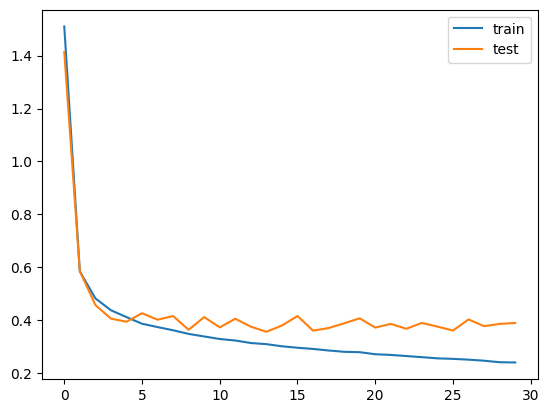

In [41]:
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()

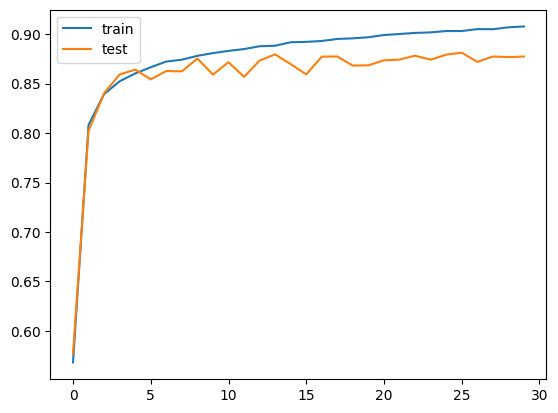

In [42]:
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='test')
plt.legend()

# Create the second ResNet Model

In [43]:
from keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Add, GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model

# Residual block definition
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    # First convolution
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    # Second convolution
    x = Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    # Add shortcut connection
    if stride != 1:  # If stride changes, adjust shortcut to match dimensions
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Input layer
input_layer = Input(shape=(28, 28, 1))

# Initial convolution and pooling (ResNet50 starts with a larger initial layer, so scaling here)
x = Conv2D(64, (7, 7), strides=2, padding='same')(input_layer)  # Larger initial filter and stride
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Add residual blocks (increase the number of filters as we go deeper)
x = residual_block(x, filters=64)
x = residual_block(x, filters=128, stride=2)
x = residual_block(x, filters=256, stride=2)
x = residual_block(x, filters=512, stride=2)

# Global average pooling and fully connected layers
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(47, activation='softmax')(x)  # Number of classes in EMNIST-balanced

# Define the ResNet model
model4 = Model(inputs=input_layer, outputs=output_layer)

In [44]:
# Summary of the model
model4.summary()

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust optimizer and learning rate
model4.compile(optimizer=optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 14, 14,    │      3,200 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_6 (ReLU)      │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 7, 7, 64)  │          0 │ re_lu_6[0][0]     │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 7, 7, 64)  │     36,928 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_7 (ReLU)      │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 7, 7, 64)  │     36,928 │ re_lu_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│                     │                   │            │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_8 (ReLU)      │ (None, 7, 7, 64)  │          0 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 4, 4, 128) │     73,856 │ re_lu_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 4, 128) │        512 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_9 (ReLU)      │ (None, 4, 4, 128) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 4, 4, 128) │    147,584 │ re_lu_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 4, 4, 128) │      8,320 │ re_lu_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 4, 128) │        512 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 4, 128) │        512 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 4,964,207 (18.94 MB)

 Trainable params: 4,958,447 (18.91 MB)

 Non-trainable params: 5,760 (22.50 KB)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
#ES = EarlyStopping(monitor='val_accuracy', min_delta=0, verbose=0, restore_best_weights=True, patience=3, mode='max')
#RLP = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

In [46]:
# Training configuration
batch_size = 256
epochs = 30

# Training the model
start_time4 = time.time()
history4 = model4.fit(X_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(X_test, y_test),callbacks=MCP)
stop_time4 = time.time()

# Calculate elapsed time
elapsed_time4 = stop_time4 - start_time4
minutes4 = int(elapsed_time4 // 60)
seconds4 = int(elapsed_time4 % 60)
print(f'training_time4 = {minutes4} min {seconds4} sec')

Epoch 1/30
 10/441 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.0977 - loss: 3.9343  

W0000 00:00:1732452804.765165     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6356 - loss: 1.3435

W0000 00:00:1732452820.347562     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1732452821.616283     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.24597, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.6359 - loss: 1.3423 - val_accuracy: 0.2460 - val_loss: 4.1425
Epoch 2/30
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8497 - loss: 0.4619
Epoch 2: val_accuracy improved from 0.24597 to 0.84749, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8498 - loss: 0.4619 - val_accuracy: 0.8475 - val_loss: 0.4712
Epoch 3/30
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8672 - loss: 0.3936
Epoch 3: val_accuracy improved from 0.84749 to 0.86994, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8672 - loss: 0.3936 - val_accuracy: 0.8699 - val_loss: 0.3815
Epoch 4/30
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8777 - loss: 0.3532
Epoch 4: val_accuracy improved from 0.86994 to 0.87042, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━

In [47]:
score = model4.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.4967
Test accuracy : 0.8837


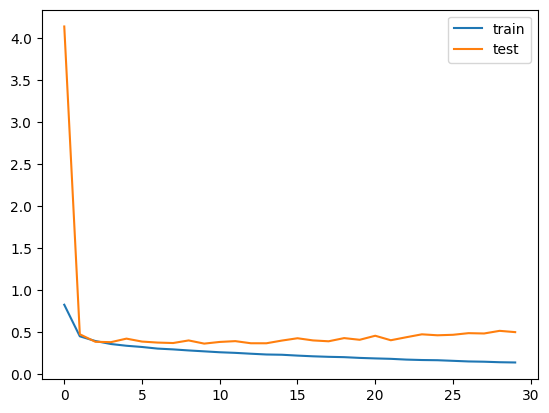

In [48]:
plt.plot(history4.history['loss'], label='train')
plt.plot(history4.history['val_loss'], label='test')
plt.legend()

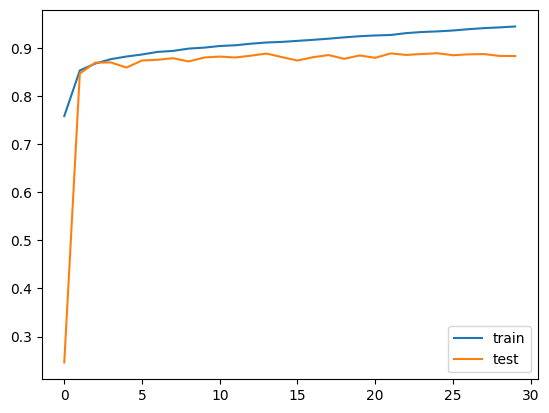

In [49]:
plt.plot(history4.history['accuracy'], label='train')
plt.plot(history4.history['val_accuracy'], label='test')
plt.legend()

# Create the third ResNet Model

In [50]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28) 

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models, transforms
import numpy as np

# Convert the data to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)    # Add channel dimension

# Normalize the data
transform = transforms.Compose([transforms.Normalize(mean=[0.5], std=[0.5])])
X_train_tensor = transform(X_train_tensor)
X_test_tensor = transform(X_test_tensor)

# Convert one-hot encoded labels to class indices
y_train_tensor = torch.argmax(torch.tensor(y_train), dim=1)
y_test_tensor = torch.argmax(torch.tensor(y_test), dim=1)

# Convert grayscale images to 3-channel images by repeating the single channel
X_train_tensor = X_train_tensor.repeat(1, 3, 1, 1)
X_test_tensor = X_test_tensor.repeat(1, 3, 1, 1)

# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [52]:
# Define the ResNet model (using a pre-trained ResNet50 as an example)
model = models.resnet50(pretrained=False)  # You can set pretrained=True if you want pre-trained weights
model.fc = nn.Linear(model.fc.in_features, 47)  # Adjust output layer for 47 classes

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [53]:
# Training loop
epochs = 35
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_predictions / total_samples
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch [1/35], Loss: 0.8622, Accuracy: 74.65%
Epoch [2/35], Loss: 0.4980, Accuracy: 83.78%
Epoch [3/35], Loss: 0.4406, Accuracy: 85.12%
Epoch [4/35], Loss: 0.3767, Accuracy: 86.55%
Epoch [5/35], Loss: 0.3637, Accuracy: 87.14%
Epoch [6/35], Loss: 0.3483, Accuracy: 87.55%
Epoch [7/35], Loss: 0.3191, Accuracy: 88.15%
Epoch [8/35], Loss: 0.2991, Accuracy: 88.84%
Epoch [9/35], Loss: 0.2885, Accuracy: 89.16%
Epoch [10/35], Loss: 0.2721, Accuracy: 89.67%
Epoch [11/35], Loss: 0.2615, Accuracy: 89.94%
Epoch [12/35], Loss: 0.2500, Accuracy: 90.19%
Epoch [13/35], Loss: 0.2376, Accuracy: 90.59%
Epoch [14/35], Loss: 0.2333, Accuracy: 90.84%
Epoch [15/35], Loss: 0.2258, Accuracy: 91.06%
Epoch [16/35], Loss: 0.2117, Accuracy: 91.50%
Epoch [17/35], Loss: 0.2124, Accuracy: 91.50%
Epoch [18/35], Loss: 0.1971, Accuracy: 91.98%
Epoch [19/35], Loss: 0.1908, Accuracy: 92.24%
Epoch [20/35], Loss: 0.1990, Accuracy: 91.99%
Epoch [21/35], Loss: 0.1821, Accuracy: 92.49%
Epoch [22/35], Loss: 0.1753, Accuracy: 92.8

In [54]:
# Save the trained model
torch.save(model.state_dict(), 'resnet_emnist.pth')

In [55]:
from torchvision import models
import torch

# Define the number of output classes
num_classes = 47  # Update this based on your dataset

# Initialize the model
model = models.resnet50(weights=None)  # 'weights=None' replaces the deprecated 'pretrained=False'
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)  # Adjust output layer

# Load the saved weights
model.load_state_dict(torch.load('resnet_emnist.pth'))

# Move model to device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set the model to evaluation mode for inference
model.eval()
correct = 0
total = 0

# Testing the model
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get the class with highest score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 88.71%
